# SPEED analysis

First we ASSEMBLE it, after that its been LABELED. Then its PACKAGED and these going into a CARTON. At last the Cartons get PALLETIZED   
It goes from Assembly (Harro Hoefliger) to Labeler (Krones) to Packaging (Schubert Verpacker) to Cartoner (Pester Umverpacker) to Palletizer (Pester)




|IP_TAG Name   |Machine|German|Optimum Speed|Alarm File location|
|--------------|-------|------|-------------|-------------------| 
|36630901_SPEED|Assembly|Montage|32 used but 35|Y:\E00_Solostar\E6_Assembly_Line_6\E63_Montage\CSV|   
|36640901_SPEED|Labeler|Etikettierer|500|Y:\E00_Solostar\E6_Assembly_Line_6\E64_Etikettierer\AuditTrail|   
|36650901_SPEED|Packaging (Pacemaker!)|Kartonierer|450 (3pcs) or 500 (5pcs)|Y:\E00_Solostar\E6_Assembly_Line_6\E65_Kartonierer\40 - Reports|   
|36680901_SPEED|Cartoner|Endverpacker (UVP)|upstream can only produce 500 max, so this max must be 500|Y:\E00_Solostar\E6_Assembly_Line_6\E68_Endverpacker\UVP|   
|36680902_SPEED|Palletizer|PAL|upstream can only produce 500 max, so this max must be 500|Y:\E00_Solostar\E6_Assembly_Line_6\E68_Endverpacker\PAL|       

adjust the IP_TREND_VALUE (speeds) to show multiple assembly lines (16) or pens per packets (3 or 5), or packets per carton (always 40), or cartons per Pallet (always 50)

In [307]:
import configparser

Config = configparser.ConfigParser()

Config.read('settings.cfg')

def ConfigSectionMap(section):
    dict1 = {}
    options = Config.options(section)
    for option in options:
        try:
            dict1[option] = Config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1



dir_sanofi_share = ConfigSectionMap("SectionOne")['sanofi']
dir_local = ConfigSectionMap("SectionOne")['local']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [308]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [309]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'
path = os.path.join(dir_sanofi_share, folder)

Files = []
df = []
df_speed = pd.DataFrame()

for filename in os.listdir( path ):
    if filename.endswith('_SPEED.csv'):
        Files.append(filename)

Files.sort(key=str.lower)

# Loop through all the files.
for filename in Files:
    path = os.path.join(dir_sanofi_share, folder, filename)
    # print (filename)
    df = pd.read_csv(path)
    df['Filename'] = filename
    df_speed = df_speed.append(df)




In [310]:
# get the packaging DESIGNATION file which shows the pcs format
folder = 'IP21_data'
path = os.path.join(dir_sanofi_share, folder)

Files = []
df_designation = pd.DataFrame()

for filename in os.listdir( path ):
    if filename.endswith('36650901_DESIGNATION.csv'):      
        path = os.path.join(dir_sanofi_share, folder, filename)
        # print (filename)
        df_designation = pd.read_csv(path)
        df_designation['Filename'] = filename

# just keep the Good QLEVEL and VALUEs like 'FS...'
df_designation = df_designation[(df_designation.IP_TREND_QLEVEL == 'Good') & (df_designation.IP_TREND_VALUE.str.contains('FS'))]


In [311]:
df_designation

,Name,IP_TREND_TIME,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Filename
0,36650901_DESIGNATION,18-AUG-21 21:24:56.5,FS 5er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
2,36650901_DESIGNATION,18-AUG-21 12:07:27.9,FS 5er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
4,36650901_DESIGNATION,18-AUG-21 11:56:23.4,FS 5er Solo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
8,36650901_DESIGNATION,16-AUG-21 06:55:09.3,FS 5er Solo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
10,36650901_DESIGNATION,12-AUG-21 16:54:58.9,FS 5er Solo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
14,36650901_DESIGNATION,06-AUG-21 18:57:04.4,FS 3er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
16,36650901_DESIGNATION,06-AUG-21 11:44:07.5,FS 3er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
18,36650901_DESIGNATION,06-AUG-21 11:21:30.1,FS 3er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
20,36650901_DESIGNATION,05-AUG-21 03:52:42.8,FS 3er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv
22,36650901_DESIGNATION,05-AUG-21 03:41:18.2,FS 3er Toujeo,Good,Good,tabIP21Data_36650901_DESIGNATION.csv


Tags for Machine speeds:

|IP_TAG Name   |Machine|Optimum Speed|
|--------------|-------|------------|
|36630901_SPEED|Assembly|32 steps x16 lines (= 512) used but max could be 35 steps|   
|36640901_SPEED|Labeler|500 pcs / min|   
|36650901_SPEED|Packaging (Pacemaker!)|3pcs per package x 150 steps = 450/min, or 5pcs per package x 100 steps = 500/min|   
|36680901_SPEED|Cartoner|aka UVP - 500 max derived from upstream|   
|36680902_SPEED|Palletizer|aka PAL - 500 max derived from upstream|    

In [312]:
# convert dates to datetime format
df_speed['IP_TREND_TIME'] = pd.to_datetime(df_speed['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_designation['IP_TREND_TIME'] = pd.to_datetime(df_designation['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_designation = df_designation.sort_values('IP_TREND_TIME')
# df_speed.set_index('IP_TREND_TIME', inplace=True)

In [313]:
# df_designation.info()

df_speed = pd.merge_asof(df_speed.sort_values('IP_TREND_TIME'), df_designation[['IP_TREND_TIME','IP_TREND_VALUE']].sort_values('IP_TREND_TIME'),on='IP_TREND_TIME', allow_exact_matches=True)

In [314]:
# rename IP_TREND_VALUE_y Format to avoid confusion
df_speed.rename(columns={'IP_TREND_VALUE_y':'Format',
                         'IP_TREND_VALUE_x':'IP_TREND_VALUE'}, inplace=True)


In [336]:
# label the rows with the Machine name
df_speed['Machine'] = ''
df_speed.loc[df_speed['Name'] == '36630901_SPEED', 'Machine'] = 'Assembly'
df_speed.loc[df_speed['Name'] == '36640901_SPEED', 'Machine'] = 'Labeler'
df_speed.loc[df_speed['Name'] == '36650901_SPEED', 'Machine'] = 'Packaging'
df_speed.loc[df_speed['Name'] == '36680901_SPEED', 'Machine'] = 'Cartoner'
df_speed.loc[df_speed['Name'] == '36680902_SPEED', 'Machine'] = 'Palletizer'

# set the Max_Speeds
df_speed['Max_Speed'] = ''
df_speed.loc[df_speed['Machine'] == 'Assembly', 'Max_Speed'] = (32*16)
df_speed.loc[df_speed['Machine'] == 'Labeler', 'Max_Speed'] = 500
# set the packaging machine to default 450 Max_Speed
df_speed.loc[df_speed['Machine'] == 'Packaging', 'Max_Speed'] = 450
# dont know what the max speeds of Cartoner and Palletizer are, so derived from upstream max
df_speed.loc[df_speed['Machine'] == 'Cartoner', 'Max_Speed'] = 450
df_speed.loc[df_speed['Machine'] == 'Palletizer', 'Max_Speed'] = 450
df_speed.loc[(df_speed['Format'].str.contains('5')) & (df_speed['Machine'] == 'Packaging'), 'Max_Speed'] = df_speed.loc[(df_speed['Format'].str.contains('5')) & (df_speed['Machine'] == 'Packaging'), 'Max_Speed'] = 500
df_speed.loc[(df_speed['Format'].str.contains('5')) & (df_speed['Machine'] == 'Cartoner'), 'Max_Speed'] = df_speed.loc[(df_speed['Format'].str.contains('5')) & (df_speed['Machine'] == 'Packaging'), 'Max_Speed'] = 500
df_speed.loc[(df_speed['Format'].str.contains('5')) & (df_speed['Machine'] == 'Palletizer'), 'Max_Speed'] = df_speed.loc[(df_speed['Format'].str.contains('5')) & (df_speed['Machine'] == 'Palletizer'), 'Max_Speed'] = 500


# adjust the IP_TREND_VALUE (speeds) to show multiple assembly lines (16) or pens per packets (3 or 5), or packets per carton (always 40), or cartons per Pallet (50)
# assembly value is multipied by 16 (lines)
df_speed.loc[df_speed.Machine == 'Assembly', 'IP_TREND_VALUE'] = df_speed.loc[df_speed.Machine == 'Assembly', 'IP_TREND_VALUE'].mul(16)
# Packaging IP_TREND_VALUE is multiplied by pcs format - we can use the Max_Speed now to work that out
df_speed.loc[(df_speed['Max_Speed'] == 500) & (df_speed['Machine'] == 'Packaging'), 'IP_TREND_VALUE'] = df_speed.loc[(df_speed['Max_Speed'] == 500) & (df_speed['Machine'] == 'Packaging'), 'IP_TREND_VALUE'].mul(5)
df_speed.loc[(df_speed['Max_Speed'] == 450) & (df_speed['Machine'] == 'Packaging'), 'IP_TREND_VALUE'] = df_speed.loc[(df_speed['Max_Speed'] == 450) & (df_speed['Machine'] == 'Packaging'), 'IP_TREND_VALUE'].mul(3)
df_speed.loc[(df_speed['Max_Speed'] == 450) & (df_speed['Machine'] == 'Cartoner'), 'IP_TREND_VALUE'] = df_speed.loc[(df_speed['Max_Speed'] == 450) & (df_speed['Machine'] == 'Cartoner'), 'IP_TREND_VALUE'].mul(3*40)
df_speed.loc[(df_speed['Max_Speed'] == 500) & (df_speed['Machine'] == 'Cartoner'), 'IP_TREND_VALUE'] = df_speed.loc[(df_speed['Max_Speed'] == 500) & (df_speed['Machine'] == 'Cartoner'), 'IP_TREND_VALUE'].mul(5*40)
df_speed.loc[(df_speed['Max_Speed'] == 450) & (df_speed['Machine'] == 'Palletizer'), 'IP_TREND_VALUE'] = df_speed.loc[(df_speed['Max_Speed'] == 450) & (df_speed['Machine'] == 'Palletizer'), 'IP_TREND_VALUE'].mul(3*40)
df_speed.loc[(df_speed['Max_Speed'] == 500) & (df_speed['Machine'] == 'Palletizer'), 'IP_TREND_VALUE'] = df_speed.loc[(df_speed['Max_Speed'] == 500) & (df_speed['Machine'] == 'Palletizer'), 'IP_TREND_VALUE'].mul(5*40)


In [361]:
df_speed[(df_speed.Machine == 'Cartoner') & (df_speed.Format.str.contains('3'))].groupby('IP_TREND_VALUE')['IP_TREND_VALUE'].value_counts()

IP_TREND_VALUE  IP_TREND_VALUE
0.0             0.0               1011
120.0           120.0              822
240.0           240.0             1637
360.0           360.0             1229
480.0           480.0              159
600.0           600.0                4
720.0           720.0                1
Name: IP_TREND_VALUE, dtype: int64

In [341]:
# take dates found in df_speed
start_date = df_speed.IP_TREND_TIME.min()
end_date = df_speed.IP_TREND_TIME.max()

daterange = pd.date_range(start = start_date, end = end_date, freq='S')

df_dates = pd.DataFrame(daterange)
df_dates.rename(columns={0:'datetime'}, inplace=True)
# df_dates.set_index(0, inplace=True)

In [342]:

df_speed = pd.merge_asof(df_dates.sort_values('datetime'), df_speed.sort_values('IP_TREND_TIME'), left_on='datetime', right_on='IP_TREND_TIME', tolerance=pd.Timedelta("1s"), direction='forward')

In [343]:
df_speed.set_index('datetime', inplace=True)

In [344]:
# convert max_speed to numeric
df_speed['Max_Speed'] = pd.to_numeric(df_speed['Max_Speed'])



In [345]:
# df_speed.info()


In [346]:
#  drop data between 22:00 on Sat through to 06:00 on Monday, as Sunday is closed on AL6
# get Tues - fri data first
df_speed_no_sunday = df_speed[(df_speed.index.dayofweek > 0) & (df_speed.index.dayofweek < 5)]

# get Mon between 06:00 and 23:59
df_mon = df_speed[df_speed.index.dayofweek == 0]
df_mon = df_mon.between_time('06:00', '23:59')
df_speed_no_sunday = df_speed_no_sunday.append(df_mon)

# get saturday between 00:00 and 22:00
df_sat = df_speed[df_speed.index.dayofweek == 5]
df_sat = df_sat.between_time('00:00', '22:00')
df_speed_no_sunday = df_speed_no_sunday.append(df_sat)

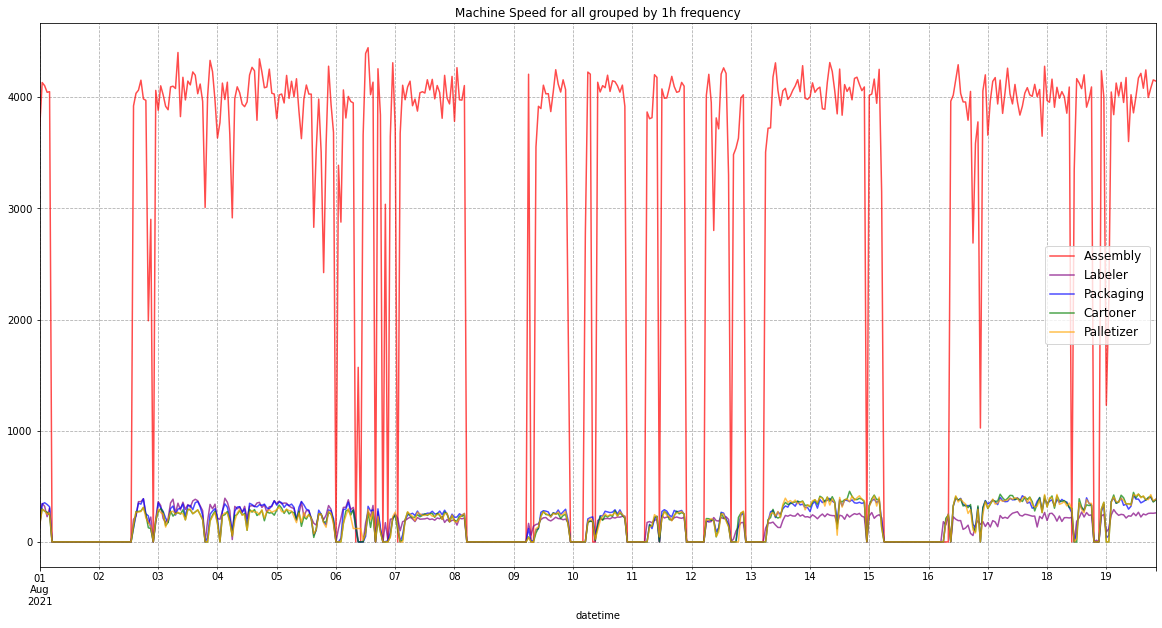

In [347]:
freq='1h'
group = df_speed.groupby(['Machine', pd.Grouper(freq=freq)]).mean().reset_index()
group.set_index('datetime', inplace=True)

# control the order of the machines so they match the line design
# machines = group.Machine.unique()
machines = ('Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer')
colors = ("red", "purple", "blue", "green", "orange")

i=0

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

for x in machines:
    # group['IP_TREND_VALUE'][group.Machine == x].plot(color=colors[i], label=x, ax=axs, alpha=0.7)
    group['IP_TREND_VALUE'][group.Machine == x].plot(color=colors[i], label=x, ax=axs, alpha=0.7)
    # plt.yscale('log')
    axs.grid(True,which="both", linestyle='--')
    axs.set_title('Machine Speed for all grouped by {} frequency'.format(freq))
    i+=1

    axs.legend()

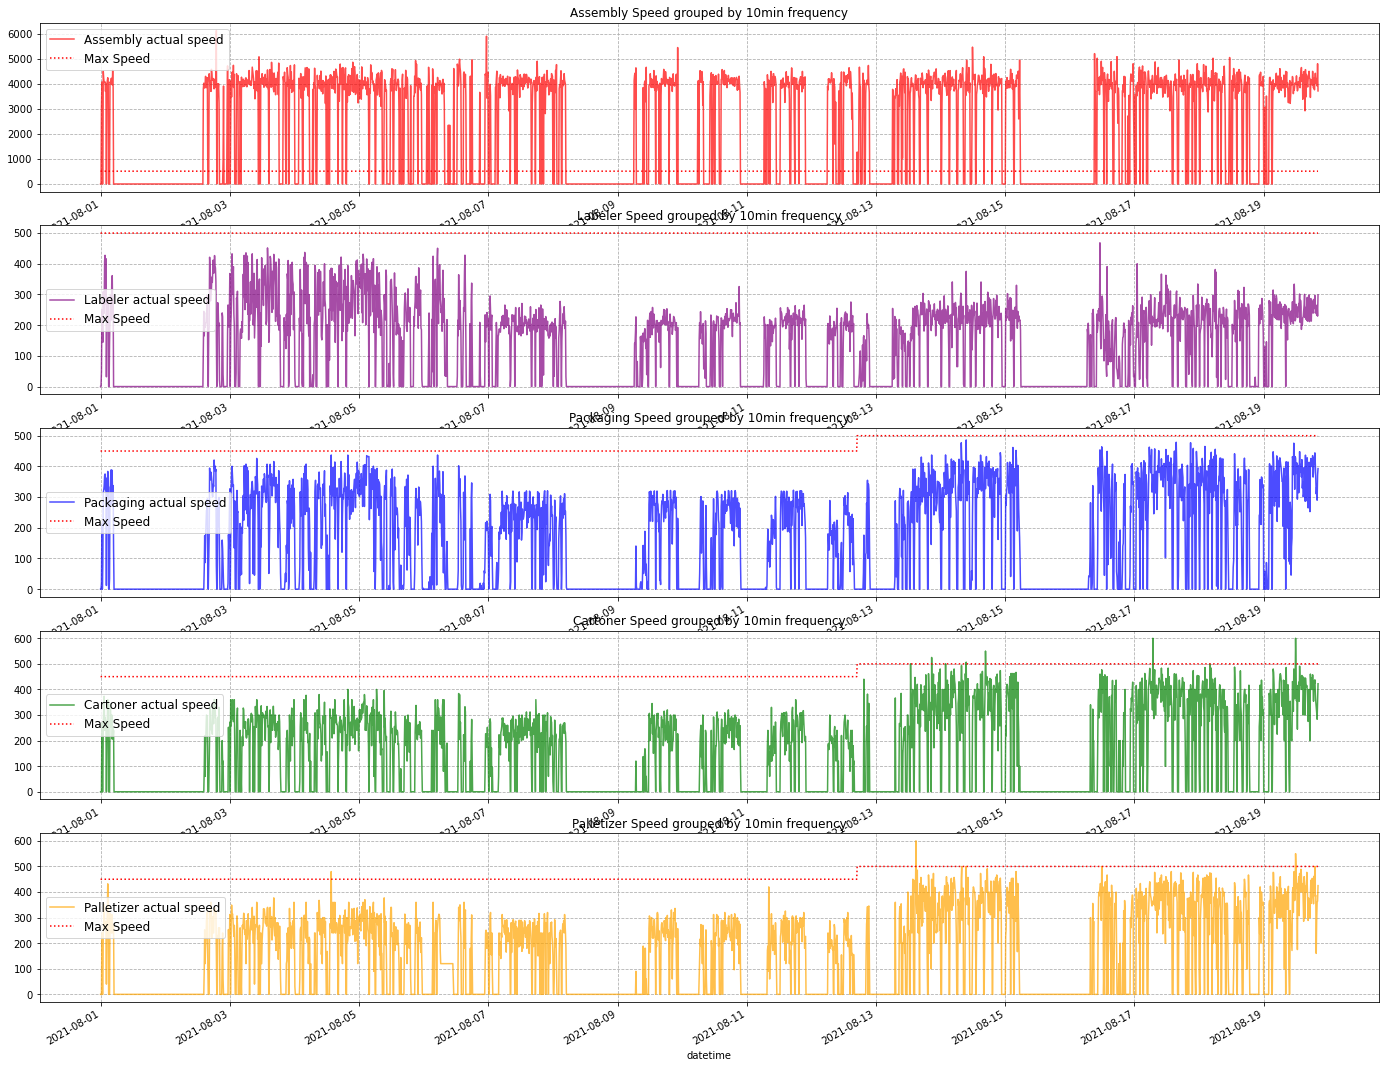

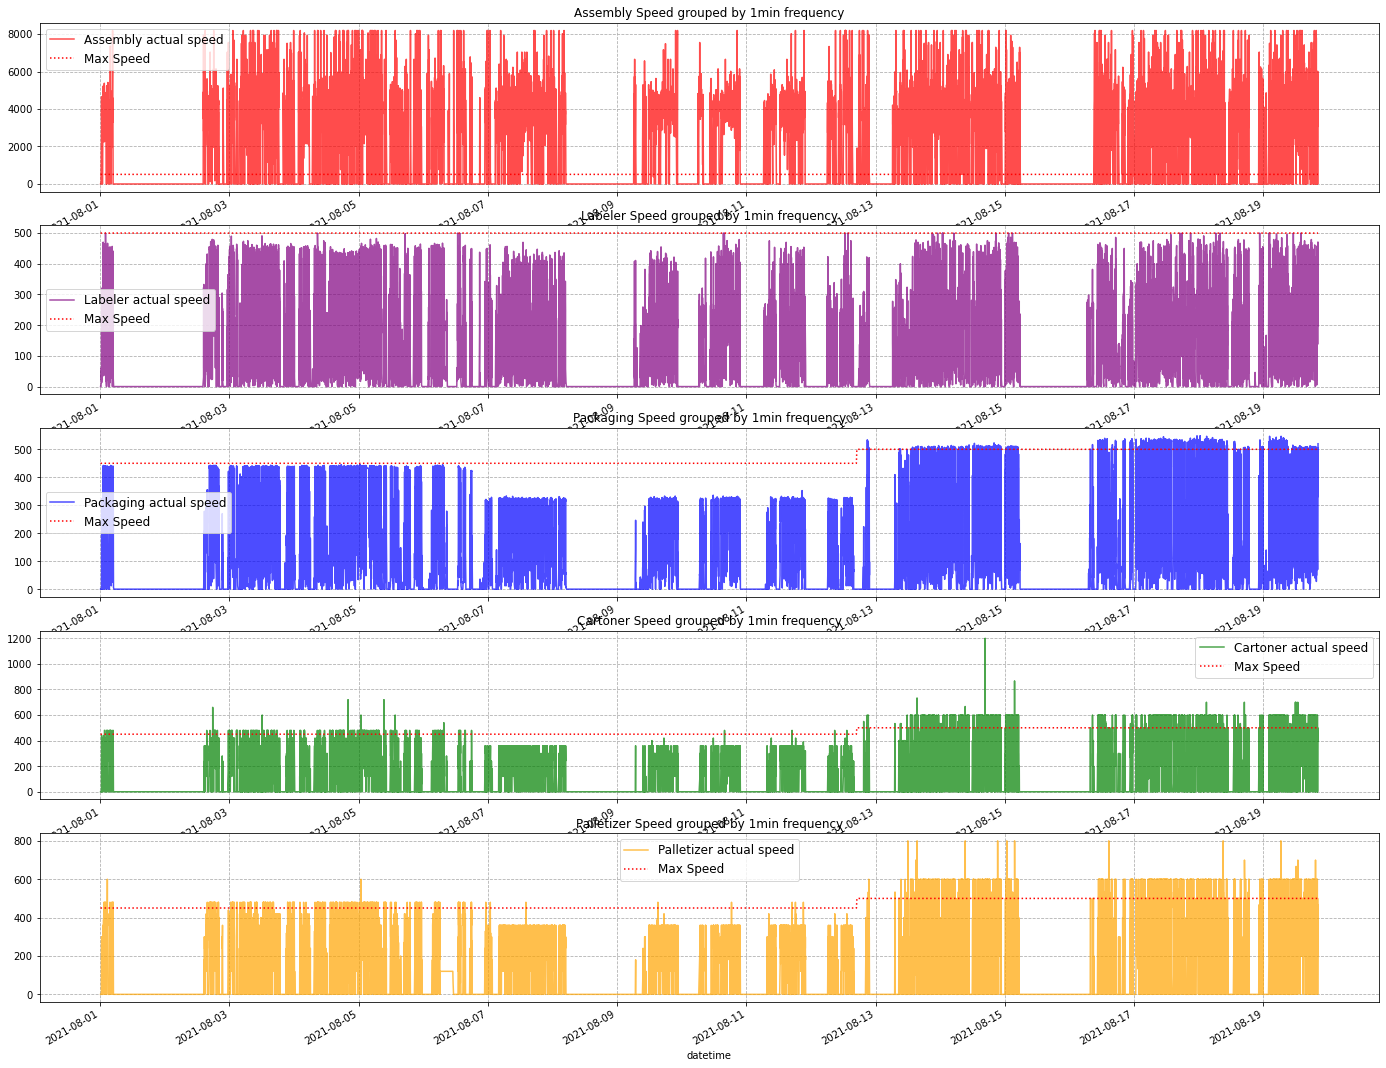

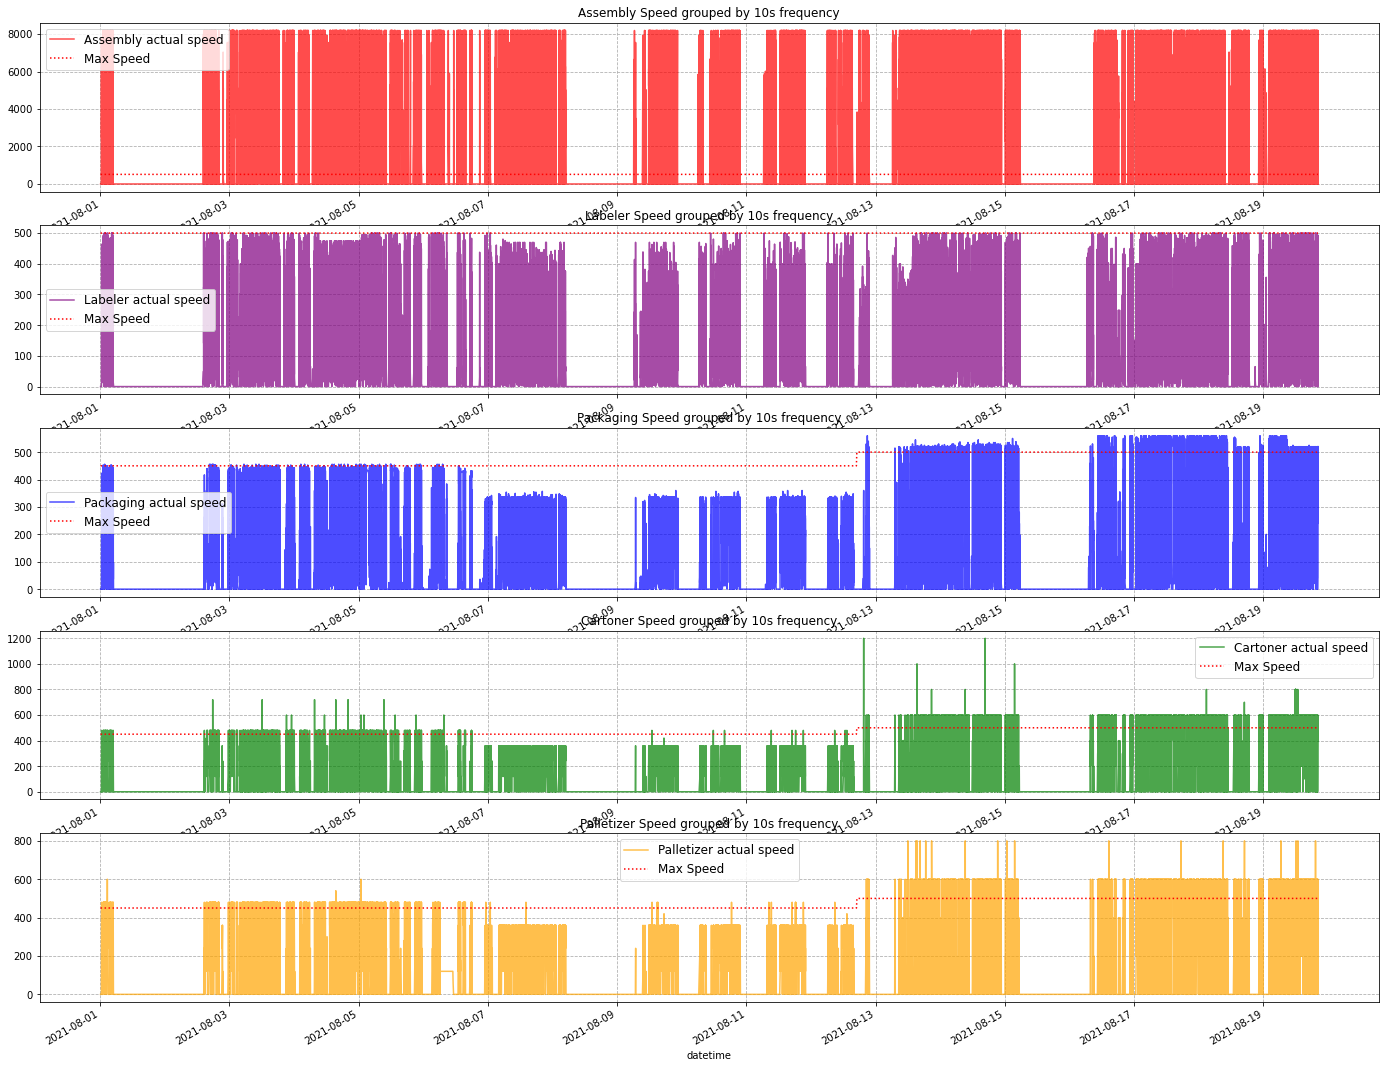

In [348]:
freq=('10min','1min','10s')

for f in freq:
    group = df_speed.groupby(['Machine', 'Max_Speed', pd.Grouper(freq=f)]).mean().reset_index()
    group.set_index('datetime', inplace=True)

    # machines = group.Machine.unique()
    # control the order of the machines
    machines = ('Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer')


    fig, axs = plt.subplots(len(machines), 1, figsize=(24, 20))

    colors = ("red", "purple", "blue", "green", "orange")
    i=0

    for x in machines:
        group['IP_TREND_VALUE'][group.Machine == x].plot(color=colors[i], label=('{} actual speed'.format(x)), ax=axs[i], alpha=0.7)
        # plt.yscale('log')

        if max(group['Max_Speed'][group.Machine == x]) > 0:
            group['Max_Speed'][group.Machine == x].plot(color='red', ls=':', label='Max Speed', ax=axs[i])

        axs[i].grid(True,which="both", linestyle='--')
        axs[i].set_title('{} Speed grouped by {} frequency'.format(x, f))
        plt.rc('legend', fontsize=12)    # legend fontsize
        axs[i].legend()
        i+=1

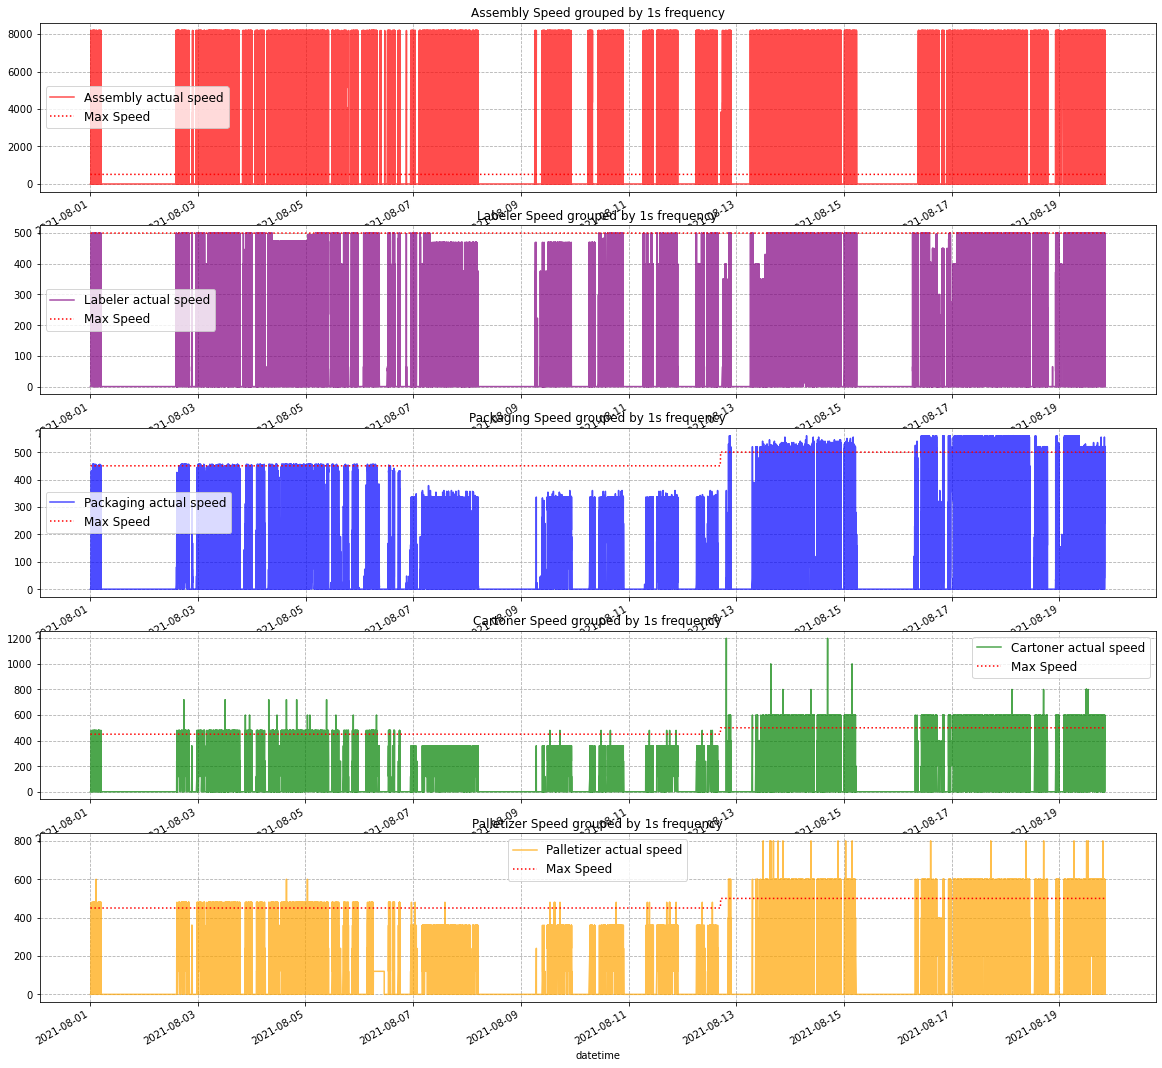

In [349]:
freq='1s'
group = df_speed.groupby(['Machine', 'Max_Speed', pd.Grouper(freq=freq)]).mean().reset_index()
group.set_index('datetime', inplace=True)

# machines = group.Machine.unique()
# control the order of the machines
machines = ('Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer')


fig, axs = plt.subplots(len(machines), 1, figsize=(20, 20))

colors = ("red", "purple", "blue", "green", "orange")
i=0

for x in machines:
    group['IP_TREND_VALUE'][group.Machine == x].plot(color=colors[i], label=('{} actual speed'.format(x)), ax=axs[i], alpha=0.7)
    # plt.yscale('log')

    if max(group['Max_Speed'][group.Machine == x]) > 0:
        group['Max_Speed'][group.Machine == x].plot(color='red', ls=':', label='Max Speed', ax=axs[i])

    axs[i].grid(True,which="both", linestyle='--')
    axs[i].set_title('{} Speed grouped by {} frequency'.format(x, freq))
    plt.rc('legend', fontsize=12)    # legend fontsize
    axs[i].legend()
    i+=1

In [350]:
# max speed for each our
freq=['1h','30min','10min','1m']
for f in freq:
    max_hours = df_speed.groupby([pd.Grouper(freq=f),'Machine'])['IP_TREND_VALUE'].max().unstack()
    print('\nMax Speeds by {}\n'.format(f), round(max_hours.describe(),2))


Max Speeds by 1h
 Machine  Assembly  Cartoner  Labeler  Packaging  Palletizer
count      453.00    453.00   453.00     453.00      453.00
mean      5768.76    344.55   345.32     308.73      339.69
std       3743.00    263.80   222.85     223.46      256.73
min          0.00      0.00     0.00       0.00        0.00
25%          0.00      0.00     0.00       0.00        0.00
50%       8192.00    360.00   500.00     360.00      360.00
75%       8192.00    600.00   500.00     520.00      600.00
max       8192.00   1200.00   500.00     560.00      800.00

Max Speeds by 30min
 Machine  Assembly  Cartoner  Labeler  Packaging  Palletizer
count      905.00    905.00   905.00     905.00      905.00
mean      5254.36    299.45   316.32     278.27      297.06
std       3928.61    261.39   230.00     227.10      256.54
min          0.00      0.00     0.00       0.00        0.00
25%          0.00      0.00     0.00       0.00        0.00
50%       8192.00    360.00   470.00     336.00      360.00

<AxesSubplot:title={'center':'np.percentile(packaging.IP_TREND_VALUE, 25)'}, xlabel='datetime'>

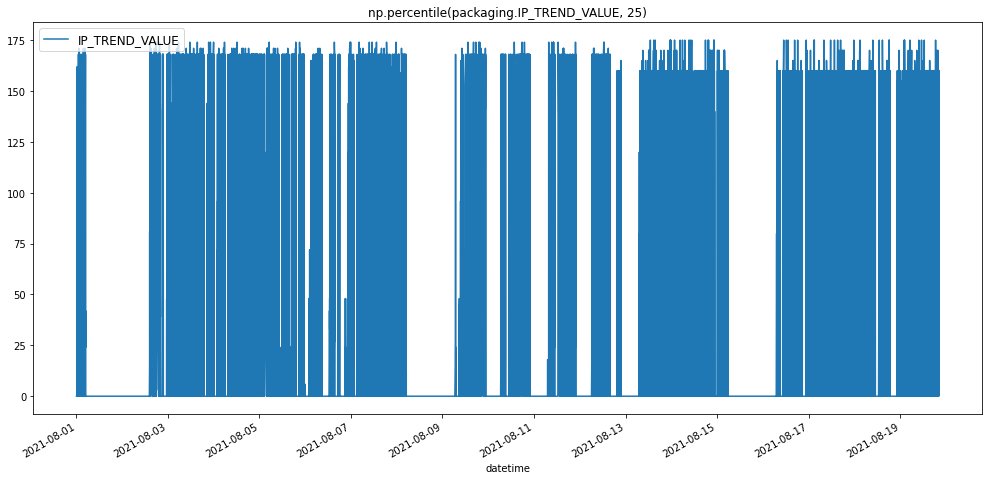

In [351]:
# get the rows for packaging where the speed is < 25% percentile
packaging = df_speed[['Machine','IP_TREND_VALUE']][df_speed.Machine == 'Packaging']
packaging[packaging.IP_TREND_VALUE < np.percentile(packaging.IP_TREND_VALUE, 25)].plot(figsize=(17,8), title='np.percentile(packaging.IP_TREND_VALUE, 25)')


<AxesSubplot:title={'center':'np.percentile(packaging.IP_TREND_VALUE, 75)'}, xlabel='datetime'>

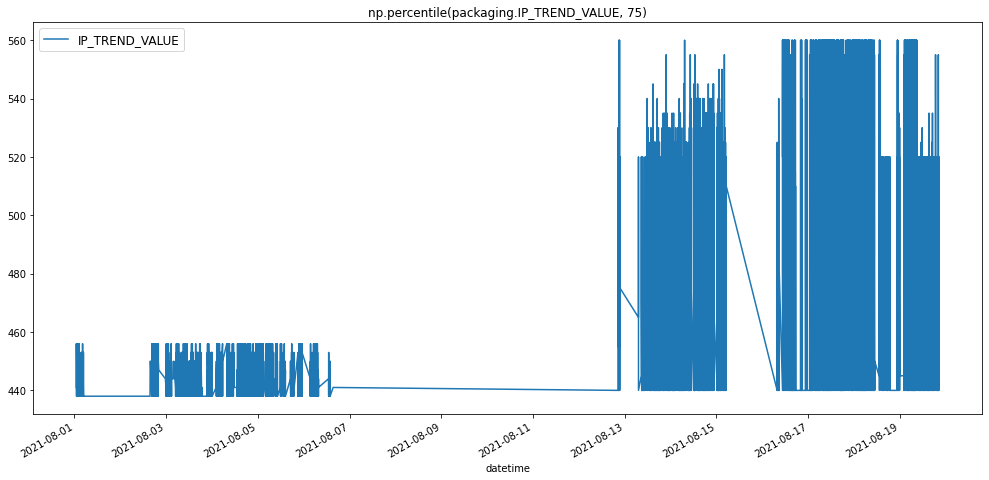

In [352]:
packaging[packaging.IP_TREND_VALUE > np.percentile(packaging.IP_TREND_VALUE, 75)].plot(figsize=(17,8), title='np.percentile(packaging.IP_TREND_VALUE, 75)')

In [353]:
# filename = 'AL6_speed.xlsx'
# folder = 'IP21'
# path = os.path.join(dir_local, folder, filename)
# df_speed.to_excel(path)


In [354]:
# reset the index and sort by Machine and time
df_speed = df_speed.reset_index().sort_values(['Machine', 'datetime'])

In [355]:
# find the speed and time diff
df_speed['speed_diff'] = df_speed.groupby(['Machine'])['IP_TREND_VALUE'].diff()
df_speed['time_diff_secs'] = df_speed.groupby('Machine').IP_TREND_TIME.diff().dt.seconds
df_speed['acceleration'] = df_speed['speed_diff'] / df_speed['time_diff_secs']

In [356]:
df_speed

,datetime,Name,IP_TREND_TIME,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Filename,Format,Machine,Max_Speed,speed_diff,time_diff_secs,acceleration
27,2021-08-01 00:08:09.800,36630901_SPEED,2021-08-01 00:08:10.500,0.0,Good,Good,tabIP21Data_36630901_SPEED.csv,NaN,Assembly,512.0,NaN,NaN,NaN
627,2021-08-01 00:18:09.800,36630901_SPEED,2021-08-01 00:18:10.500,0.0,Good,Good,tabIP21Data_36630901_SPEED.csv,NaN,Assembly,512.0,0.0,600.0,0.000000
1227,2021-08-01 00:28:09.800,36630901_SPEED,2021-08-01 00:28:10.300,0.0,Good,Good,tabIP21Data_36630901_SPEED.csv,NaN,Assembly,512.0,0.0,599.0,0.000000
1272,2021-08-01 00:28:54.800,36630901_SPEED,2021-08-01 00:28:55.300,1536.0,Good,Good,tabIP21Data_36630901_SPEED.csv,NaN,Assembly,512.0,1536.0,45.0,34.133333
1273,2021-08-01 00:28:55.800,36630901_SPEED,2021-08-01 00:28:56.300,8192.0,Good,Good,tabIP21Data_36630901_SPEED.csv,NaN,Assembly,512.0,6656.0,1.0,6656.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627900,2021-08-19 20:19:22.800,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1627901,2021-08-19 20:19:23.800,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1627902,2021-08-19 20:19:24.800,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1627903,2021-08-19 20:19:25.800,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
# put the datetimeindex back
df_speed.set_index('datetime', inplace=True)


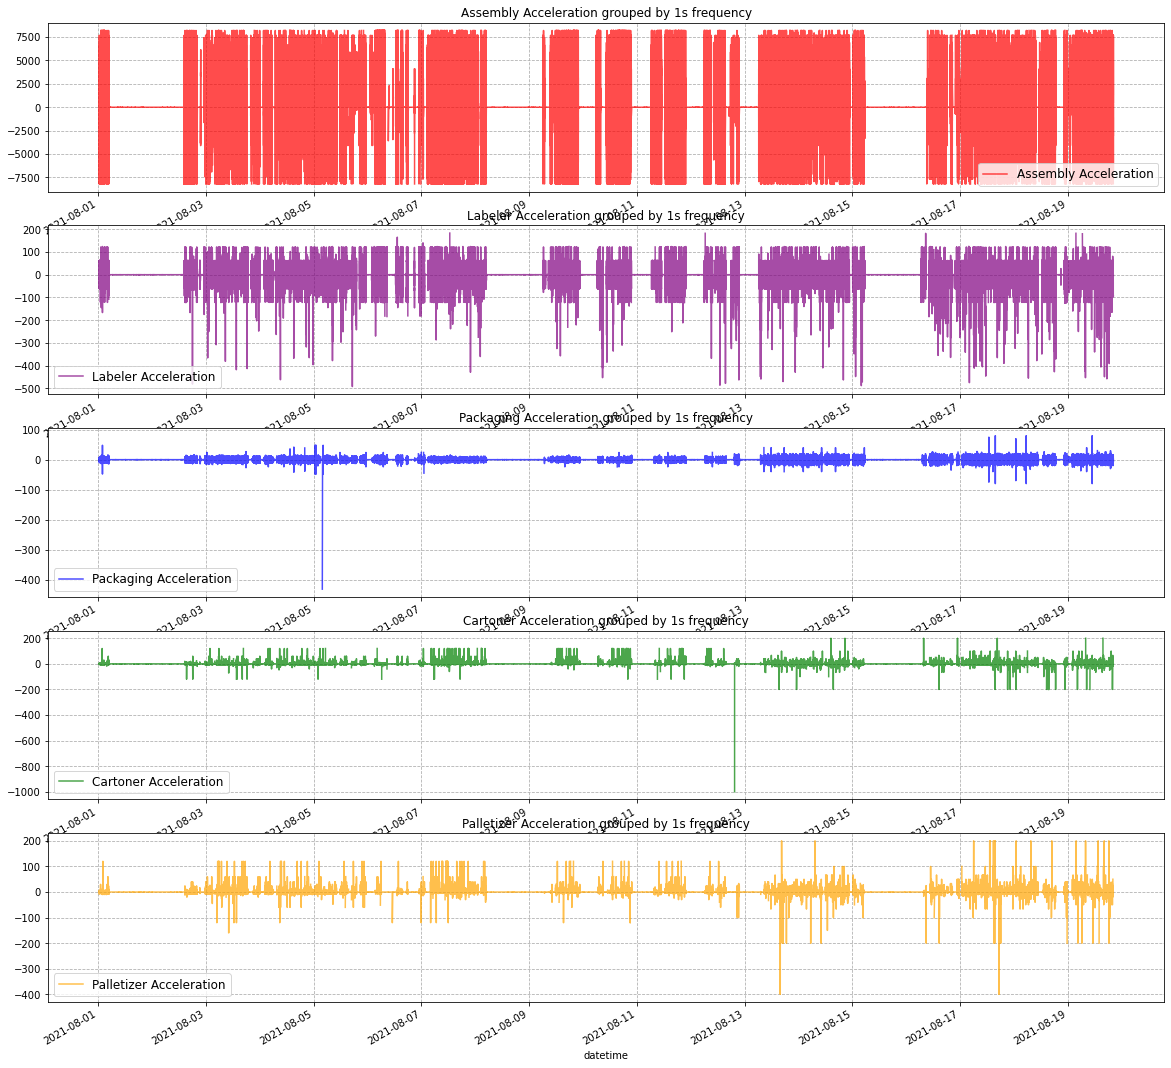

In [358]:
freq='1s'

group = df_speed.groupby(['Machine', 'Max_Speed', pd.Grouper(freq=freq)]).mean().reset_index()
group.set_index('datetime', inplace=True)

machines = ('Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer')


fig, axs = plt.subplots(len(machines), 1, figsize=(20, 20))

colors = ("red", "purple", "blue", "green", "orange")
i=0

for x in machines:
    group['acceleration'][group.Machine == x].plot(color=colors[i], label=('{} Acceleration'.format(x)), ax=axs[i], alpha=0.7)
    # plt.yscale('log')

    axs[i].grid(True,which="both", linestyle='--')
    axs[i].set_title('{} Acceleration grouped by {} frequency'.format(x, freq))
    plt.rc('legend', fontsize=12)    # legend fontsize
    axs[i].legend()
    i+=1

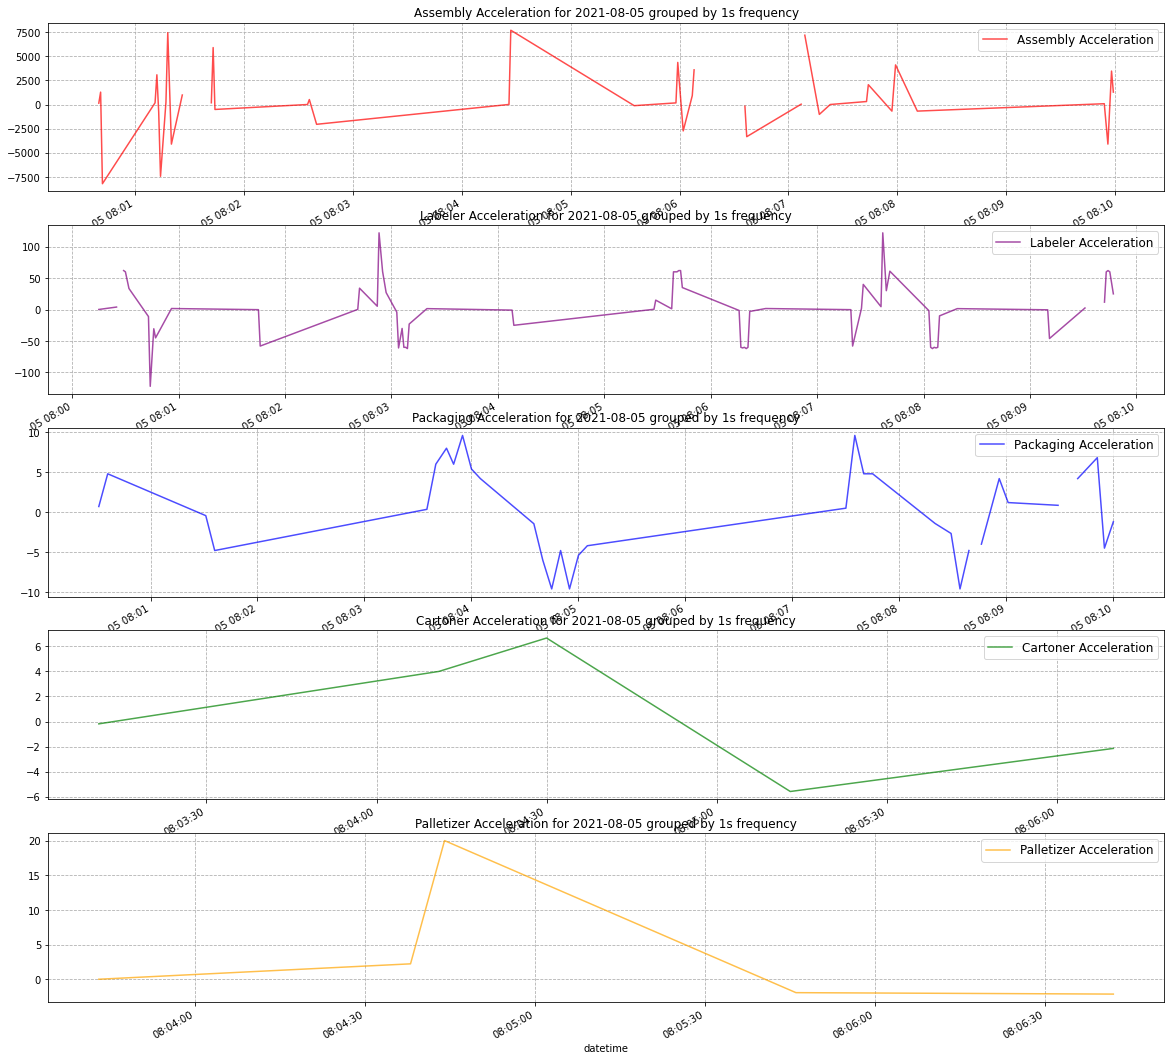

In [359]:
daterange = '2021-08-05'
times = ['08:00', '08:10']
freq='1s'

dates = group.loc[daterange]
dates = dates.between_time(times[0], times[1])

dates = dates.groupby(['Machine', 'Max_Speed', pd.Grouper(freq=freq)]).mean().reset_index()
dates.set_index('datetime', inplace=True)


fig, axs = plt.subplots(len(machines), 1, figsize=(20, 20))

colors = ("red", "purple", "blue", "green", "orange")
i=0

for x in machines:
    dates['acceleration'][dates.Machine == x].plot(color=colors[i], label=('{} Acceleration'.format(x)), ax=axs[i], alpha=0.7)
    # plt.yscale('log')

    axs[i].grid(True,which="both", linestyle='--')
    axs[i].set_title('{} Acceleration for {} grouped by {} frequency'.format(x, daterange, freq))
    plt.rc('legend', fontsize=12)    # legend fontsize
    axs[i].legend()
    i+=1

In [360]:
dates

,Machine,Max_Speed,IP_TREND_VALUE,speed_diff,time_diff_secs,acceleration
datetime,,,,,,
2021-08-05 08:00:40,Assembly,512.0,6912.0,6912.0,50.0,138.240000
2021-08-05 08:00:41,Assembly,512.0,8192.0,1280.0,1.0,1280.000000
2021-08-05 08:00:42,Assembly,512.0,0.0,-8192.0,1.0,-8192.000000
2021-08-05 08:01:11,Assembly,512.0,5120.0,5120.0,29.0,176.551724
2021-08-05 08:01:12,Assembly,512.0,8192.0,3072.0,1.0,3072.000000
...,...,...,...,...,...,...
2021-08-05 08:03:43,Palletizer,450.0,0.0,0.0,599.0,0.000000
2021-08-05 08:04:38,Palletizer,450.0,120.0,120.0,54.0,2.222222
2021-08-05 08:04:44,Palletizer,450.0,240.0,120.0,6.0,20.000000


In [195]:
times[0]

'08:00'